In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../15.1 DATA/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df.shape

(42000, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
3818,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# label = 6 i.e no is 9 lets see it visually

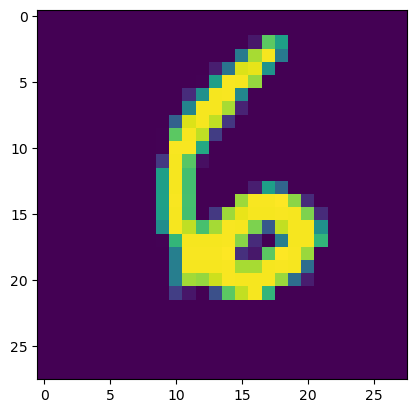

In [31]:
import matplotlib.pyplot as  plt

plt.imshow(df.iloc[3818,1:].values.reshape(28,28))

### Without PCA

In [8]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
x_train.shape

(33600, 784)

In [11]:
from sklearn.neighbors import KNeighborsClassifier

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(x_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [14]:
import time
start = time.time()

In [15]:
y_pred = knn.predict(x_test)

In [16]:
print(time.time()-start)

9.009487867355347


In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9648809523809524

### Using PCA

In [18]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

In [19]:
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [20]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)
# n_components is a hyperparameter which decides the component you want
# If none=same components

In [21]:
x_train1 = pca.fit_transform(x_train)
x_test1 = pca.transform(x_test)

In [22]:
x_train1.shape

(33600, 784)

In [23]:
# 784 columns

In [24]:
pca = PCA(n_components=100)

In [25]:
x_train2 = pca.fit_transform(x_train)
x_test2 = pca.transform(x_test)

In [26]:
x_train2.shape

(33600, 100)

In [27]:
# 100 columns

In [28]:
knn = KNeighborsClassifier()

In [29]:
knn.fit(x_train2,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [30]:
y_pred = knn.predict(x_test2)

In [32]:
accuracy_score(y_test,y_pred)

0.9544047619047619

In [33]:
for i in range(1,785):
    pca = PCA(n_components=i)
    x_train_trf = pca.fit_transform(x_train)
    x_test_trf = pca.transform(x_test)
    
    knn = KNeighborsClassifier()
    knn.fit(x_train_trf,y_train)
    y_pred=knn.predict(x_test_trf)
    print(accuracy_score(y_test,y_pred))

0.2580952380952381
0.3236904761904762
0.5104761904761905
0.6663095238095238
0.7378571428571429
0.8227380952380953
0.8436904761904762
0.8721428571428571
0.886547619047619
0.9055952380952381
0.9116666666666666
0.9184523809523809
0.9276190476190476
0.9351190476190476
0.9384523809523809
0.9379761904761905
0.9407142857142857
0.94
0.9425
0.9442857142857143
0.9438095238095238
0.9441666666666667
0.9442857142857143
0.9457142857142857
0.9484523809523809
0.9479761904761905
0.9478571428571428
0.9471428571428572
0.949047619047619
0.9491666666666667
0.9507142857142857
0.9513095238095238
0.95
0.9504761904761905
0.950952380952381
0.9519047619047619
0.9517857142857142
0.9527380952380953
0.9533333333333334
0.9528571428571428
0.9522619047619048
0.9522619047619048
0.9523809523809523
0.9533333333333334
0.9528571428571428
0.9530952380952381
0.9530952380952381
0.9533333333333334
0.9527380952380953
0.9533333333333334
0.9545238095238096
0.954047619047619
0.9541666666666667
0.9541666666666667
0.9546428571428571

In [35]:
### Now lets see the visualization part

In [36]:
# Transforming to a 2D coordinate system
pca = PCA(n_components=2)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [37]:
x_train_trf

array([[-2.71863253, -0.48982409],
       [-0.67698015, -6.75362491],
       [-3.03323281,  6.50981624],
       ...,
       [ 2.14883643,  0.78079444],
       [ 1.05957006,  0.94767312],
       [17.70258446,  1.96188185]])

In [41]:
!pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   - -------------------------------------- 0.3/9.9 MB ? eta -:--:--
   ----- ---------------------------------- 1.3/9.9 MB 4.2 MB/s eta 0:00:03
   --------- ------------------------------ 2.4/9.9 MB 4.6 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.9 MB 4.4 MB/s eta 0:00:02
   ------------------ --------------------- 4.5/9.9 MB 4.9 MB/s eta 0:00:02
   -------------------- ------------------- 5.0/9.9 MB 4.9 MB/s eta 0:00:02
   --------------------- ------------------ 5.2/9.9 MB 3.8 MB/s eta 0:00:02
   -------------------------- ------------- 6.6/9.9 MB 4.2 MB/s eta 0:00:01
   ------------------------------ --------- 7.6/9.9 MB 4.4 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 4.7 MB/s eta 0:00:01
   -------------------------------------- - 9.4/9.9 MB 4.6 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.9 MB 4.3 MB/s eta 0:00:01
   -----------------------

In [67]:
import plotly.io as pio
pio.renderers.default = "browser"

In [68]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter(x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 color=y_train_trf,
                 color_discrete_sequence=px.colors.qualitative.G10)

fig.show()

In [46]:
# Transforming to a #D coordinate system
pca = PCA(n_components=3)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [47]:
x_train_trf

array([[-2.71863253, -0.48982409,  1.1354966 ],
       [-0.67698015, -6.75362491, -2.33590139],
       [-3.03323281,  6.50981624,  7.49182983],
       ...,
       [ 2.14883643,  0.78079444, -0.74738774],
       [ 1.05957006,  0.94767312,  3.94973114],
       [17.70258446,  1.96188185, -4.94352837]])

In [69]:
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(x_train_trf,
                 x=x_train_trf[:,0],
                 y=x_train_trf[:,1],
                 z=x_train_trf[:,2],
                 color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,t=20,b=20))

fig.show()

In [50]:
# Here plotly will give you a dynamic visualization where you can interact with the visualization

In [51]:
# Attributes of pca
pca.explained_variance_
# Eigen values

array([40.67111198, 29.17023401, 26.74459621])

In [52]:
pca.components_
# Eigen Vectors

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [-0., -0., -0., ..., -0., -0., -0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [53]:
# To calculate the percentage of eigen vector
pca.explained_variance_ratio_

array([0.05785192, 0.0414927 , 0.03804239])

In [54]:
# Lest find optimal number for n_components
pca = PCA(n_components=None)
x_train_trf = pca.fit_transform(x_train)
x_test_trf = pca.transform(x_test)

In [55]:
x_test_trf.shape

(8400, 784)

In [56]:
pca.explained_variance_

array([4.06711120e+01, 2.91702340e+01, 2.67445962e+01, 2.08534479e+01,
       1.81489188e+01, 1.58529825e+01, 1.38710810e+01, 1.24805897e+01,
       1.10279424e+01, 1.00958253e+01, 9.63317821e+00, 8.62785945e+00,
       8.06303131e+00, 7.89511749e+00, 7.44167929e+00, 7.17032873e+00,
       6.73266373e+00, 6.62744023e+00, 6.41499161e+00, 6.25808269e+00,
       5.90495742e+00, 5.76521585e+00, 5.52084601e+00, 5.32003847e+00,
       5.18309925e+00, 4.93439597e+00, 4.90652171e+00, 4.71800493e+00,
       4.49824444e+00, 4.43140305e+00, 4.32604521e+00, 4.23491831e+00,
       4.10335015e+00, 4.06731180e+00, 4.02362178e+00, 3.84130473e+00,
       3.81886146e+00, 3.71316498e+00, 3.60918108e+00, 3.47303214e+00,
       3.42842989e+00, 3.38841159e+00, 3.29157511e+00, 3.22927379e+00,
       3.21745142e+00, 3.15810372e+00, 3.12620905e+00, 3.10412385e+00,
       3.05892795e+00, 3.03728188e+00, 2.96540461e+00, 2.94033669e+00,
       2.86828564e+00, 2.82617865e+00, 2.80038441e+00, 2.77411221e+00,
      

In [57]:
pca.components_.shape

(784, 784)

In [58]:
pca.explained_variance_ratio_

array([5.78519225e-02, 4.14926968e-02, 3.80423901e-02, 2.96626277e-02,
       2.58156168e-02, 2.25498018e-02, 1.97306802e-02, 1.77527998e-02,
       1.56865066e-02, 1.43606328e-02, 1.37025484e-02, 1.22725500e-02,
       1.14691200e-02, 1.12302739e-02, 1.05852885e-02, 1.01993106e-02,
       9.57676152e-03, 9.42708817e-03, 9.12489429e-03, 8.90170190e-03,
       8.39940495e-03, 8.20063196e-03, 7.85303229e-03, 7.56739707e-03,
       7.37261022e-03, 7.01884653e-03, 6.97919728e-03, 6.71104483e-03,
       6.39845030e-03, 6.30337291e-03, 6.15350848e-03, 6.02388659e-03,
       5.83673972e-03, 5.78547759e-03, 5.72333148e-03, 5.46399774e-03,
       5.43207369e-03, 5.28172755e-03, 5.13381744e-03, 4.94015474e-03,
       4.87671103e-03, 4.81978768e-03, 4.68204430e-03, 4.59342487e-03,
       4.57660834e-03, 4.49219022e-03, 4.44682221e-03, 4.41540749e-03,
       4.35111936e-03, 4.32032928e-03, 4.21808870e-03, 4.18243127e-03,
       4.07994349e-03, 4.02004913e-03, 3.98335855e-03, 3.94598812e-03,
      

In [59]:
# lets check the cummulative sum of components upto 90% variance
np.cumsum(pca.explained_variance_ratio_)

array([0.05785192, 0.09934462, 0.13738701, 0.16704964, 0.19286525,
       0.21541506, 0.23514574, 0.25289854, 0.26858504, 0.28294568,
       0.29664822, 0.30892077, 0.32038989, 0.33162017, 0.34220546,
       0.35240477, 0.36198153, 0.37140862, 0.38053351, 0.38943521,
       0.39783462, 0.40603525, 0.41388828, 0.42145568, 0.42882829,
       0.43584714, 0.44282633, 0.44953738, 0.45593583, 0.4622392 ,
       0.46839271, 0.4744166 , 0.48025334, 0.48603881, 0.49176214,
       0.49722614, 0.50265822, 0.50793994, 0.51307376, 0.51801392,
       0.52289063, 0.52771041, 0.53239246, 0.53698588, 0.54156249,
       0.54605468, 0.5505015 , 0.55491691, 0.55926803, 0.56358836,
       0.56780645, 0.57198888, 0.57606882, 0.58008887, 0.58407223,
       0.58801822, 0.59188694, 0.59571889, 0.59948441, 0.60322635,
       0.60687487, 0.6104829 , 0.61402176, 0.61750117, 0.62094441,
       0.62432378, 0.62767368, 0.63099377, 0.63426257, 0.63746765,
       0.64065542, 0.64376931, 0.64686564, 0.64992395, 0.65296

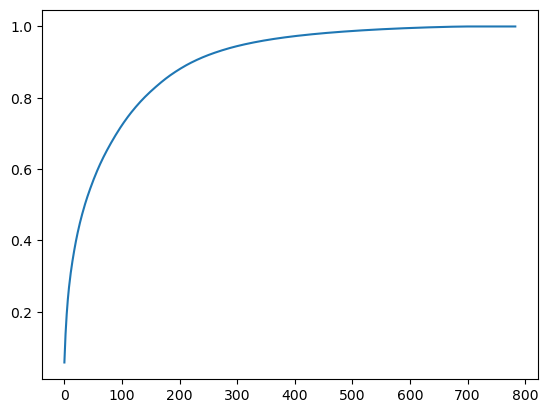

In [60]:
# Lets plot to check the 90%
plt.plot(np.cumsum(pca.explained_variance_ratio_))